1. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

2. Import Dataset 

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\heart.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [5]:
df.shape

(1025, 14)

In [6]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
775,51,1,2,100,222,0,1,143,1,1.2,1,0,2,1
836,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1
570,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
341,44,1,2,120,226,0,1,169,0,0.0,2,0,2,1
113,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0


Description

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


Analysing the 'target' variable

In [11]:
df["target"].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [12]:
df["target"].unique()

array([0, 1], dtype=int64)

Checking correlation between columns

In [13]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


EDA

target
1    526
0    499
Name: count, dtype: int64


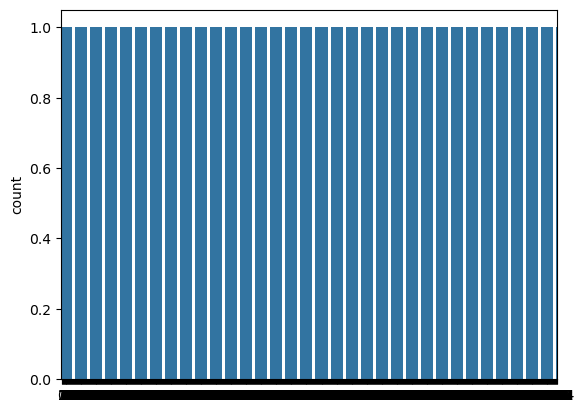

In [14]:
y = df["target"]

sns.countplot(y)


target_temp = df.target.value_counts()

print(target_temp)

In [15]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 164.69
Percentage of patience with heart problems: 173.6


In [16]:
df["sex"].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='sex', ylabel='target'>

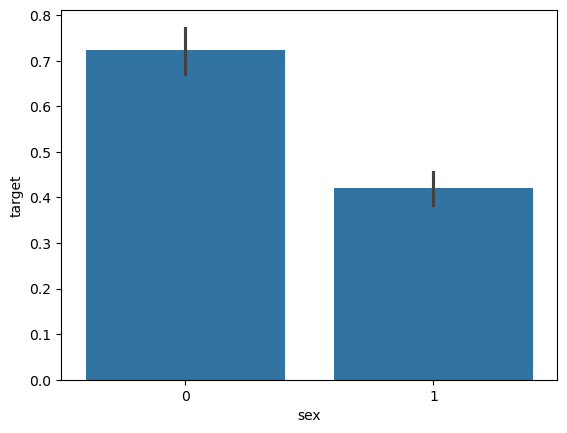

In [17]:
sns.barplot(x="sex", y=y, data=df)

Analysing the chest pain

In [18]:
df["cp"].unique()

array([0, 1, 2, 3], dtype=int64)

<Axes: xlabel='cp', ylabel='target'>

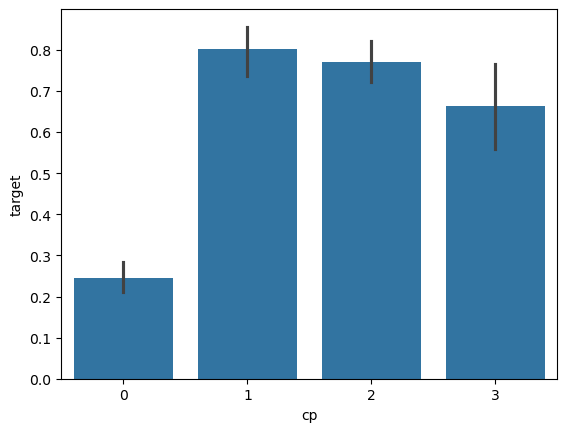

In [19]:
sns.barplot(x="cp", y=y, data=df)

Analysing FBS Feature 

In [20]:
df["fbs"].describe()

count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

In [21]:
df["fbs"].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='fbs', ylabel='target'>

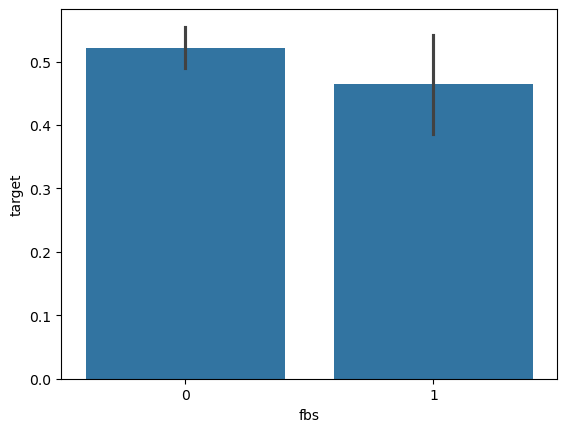

In [22]:
sns.barplot(x="fbs", y=y, data=df)

Analysing the restecg feature

In [23]:
df["restecg"].describe()

count    1025.000000
mean        0.529756
std         0.527878
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: restecg, dtype: float64

In [24]:
df["restecg"].unique()

array([1, 0, 2], dtype=int64)

<Axes: xlabel='restecg', ylabel='target'>

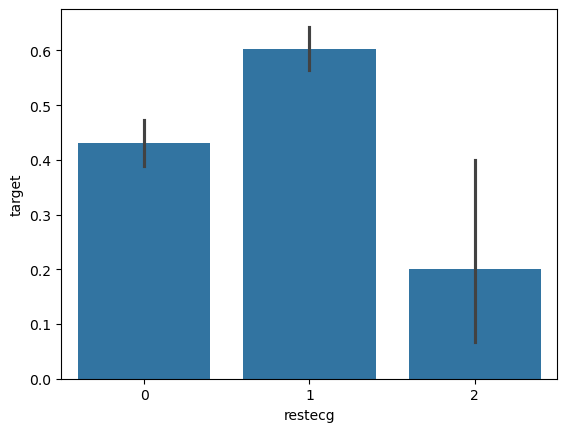

In [25]:
sns.barplot(x="restecg", y=y, data=df)

Analysing the 'exang' feature

In [26]:
df["exang"].describe()

count    1025.000000
mean        0.336585
std         0.472772
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: exang, dtype: float64

In [27]:
df["exang"].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='exang', ylabel='target'>

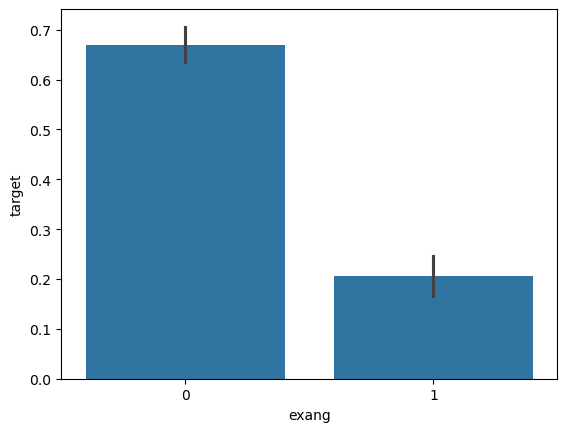

In [28]:
sns.barplot(x="exang", y=y, data=df)

Analysing the Slope feature

In [29]:
df["slope"].describe()

count    1025.000000
mean        1.385366
std         0.617755
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: slope, dtype: float64

In [30]:
df["slope"].unique()

array([2, 0, 1], dtype=int64)

<Axes: xlabel='slope', ylabel='target'>

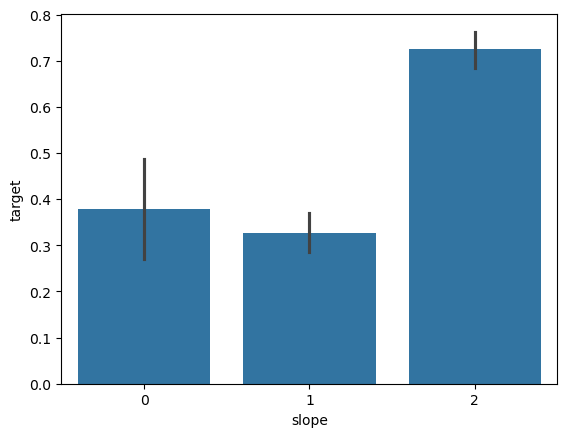

In [31]:
sns.barplot(x="slope", y=y, data=df)

Analysing the 'ca' feature

In [32]:
df["ca"].unique()

array([2, 0, 1, 3, 4], dtype=int64)

<Axes: ylabel='count'>

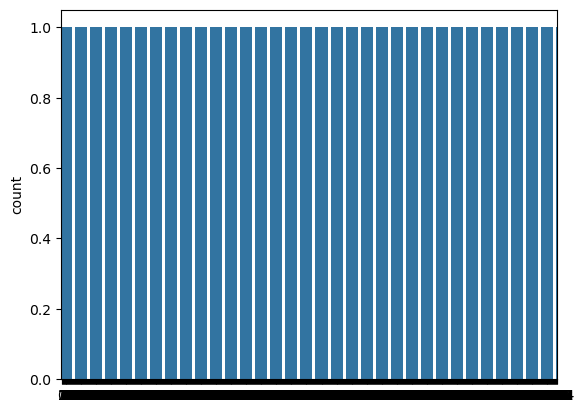

In [33]:
sns.countplot(df["ca"])

<Axes: xlabel='ca', ylabel='target'>

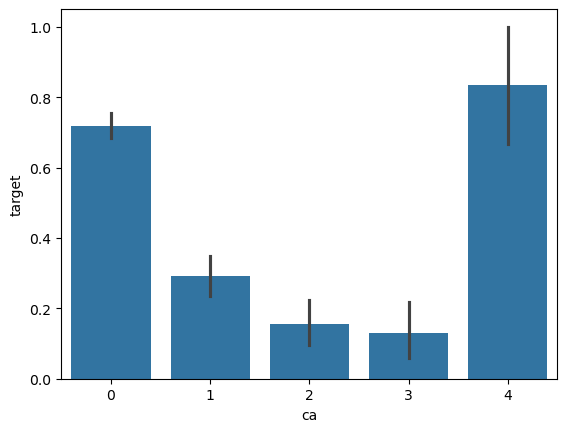

In [34]:
sns.barplot(x="ca", y=y, data=df)

In [35]:
#Analysing the 'thal' feature

df["thal"].unique()

array([3, 2, 1, 0], dtype=int64)

<Axes: xlabel='thal', ylabel='target'>

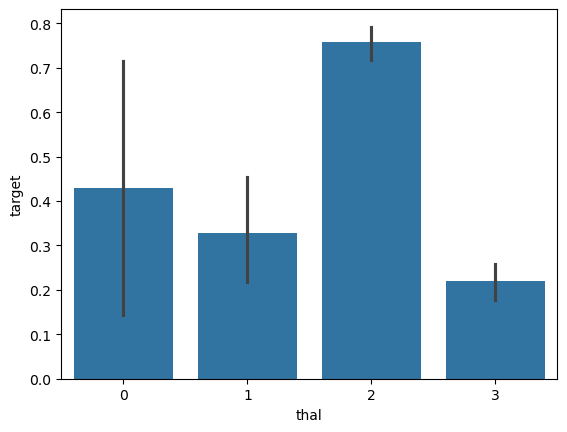

In [36]:
sns.barplot(x="thal", y=y, data=df)

C:\Users\Dell\AppData\Local\Temp\ipykernel_14308\1422741363.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["thal"])


<Axes: xlabel='thal', ylabel='Density'>

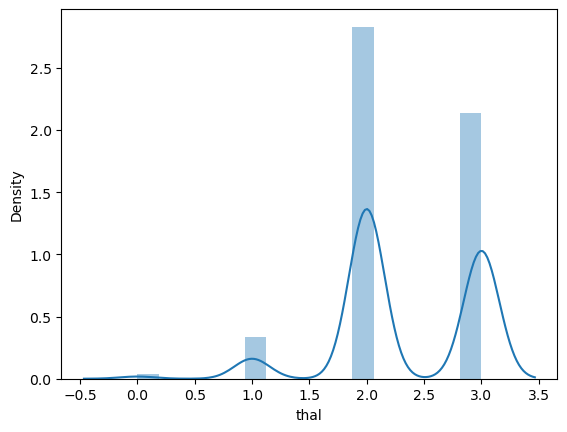

In [37]:
sns.distplot(df["thal"])

C:\Users\Dell\AppData\Local\Temp\ipykernel_14308\1126015165.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["thal"])


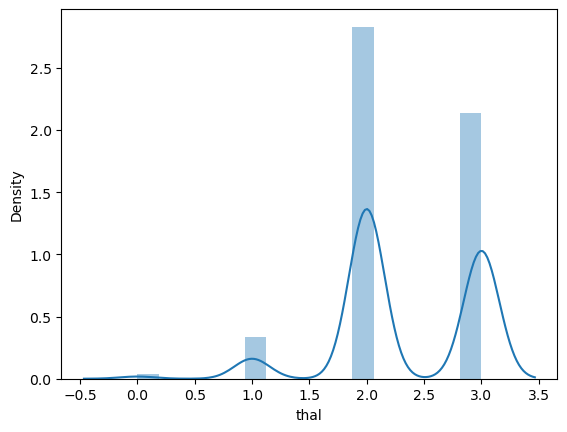

In [38]:
sns.distplot(df["thal"])

import warnings
warnings.filterwarnings("ignore")

IV. Train Test split

In [39]:
from sklearn.model_selection import train_test_split

predictors = df.drop("target",axis=1)
target = df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [40]:
X_train.shape

(820, 13)

In [41]:
X_test.shape

(205, 13)

In [42]:
Y_train.shape

(820,)

In [43]:
Y_test.shape

(205,)

V. Model Fitting

In [44]:
from sklearn.metrics import accuracy_score

Logistic Regression

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_scaled, Y_train)  
Y_pred_lr = lr.predict(X_test_scaled)


In [46]:
Y_pred_lr.shape

(205,)

In [47]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %


Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [49]:
Y_pred_nb.shape

(205,)

In [50]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.37 %


SVM

In [51]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [52]:
Y_pred_svm.shape

(205,)

In [53]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.9 %


K Nearest Neighbors

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [55]:
Y_pred_knn.shape

(205,)

In [56]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using Linear KNN is: "+str(score_knn)+" %")

The accuracy score achieved using Linear KNN is: 72.2 %


Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [58]:
Y_pred_dt.shape

(205,)

In [59]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [61]:
Y_pred_rf.shape

(205,)

In [62]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


XGBoost

In [63]:
!pip install xgboost


In [64]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [65]:
Y_pred_xgb.shape

(205,)

In [66]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 100.0 %


Neural Network

In [67]:
from keras.models import Sequential
from keras.layers import Dense

In [68]:
import warnings
warnings.filterwarnings("ignore")


In [69]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [70]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5293 - loss: 34.4229   
Epoch 2/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5292 - loss: 16.0954 
Epoch 3/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5601 - loss: 5.3414 
Epoch 4/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5679 - loss: 5.3045 
Epoch 5/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5703 - loss: 5.1944 
Epoch 6/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5815 - loss: 4.8142 
Epoch 7/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6122 - loss: 3.8708 
Epoch 8/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6075 - loss: 3.8841 
Epoch 9/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6429 - loss: 3.2896 
Epoch 10/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6647 - loss: 2.8119 
Epoch 11/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6146 - loss: 2.8682 
Epoch 12/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

In [71]:
Y_pred_nn = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [72]:
Y_pred_nn.shape

(205, 1)

In [73]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [74]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 85.37 %


Output final score

In [75]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %
The accuracy score achieved using Naive Bayes is: 85.37 %
The accuracy score achieved using Support Vector Machine is: 83.9 %
The accuracy score achieved using K-Nearest Neighbors is: 72.2 %
The accuracy score achieved using Decision Tree is: 100.0 %
The accuracy score achieved using Random Forest is: 100.0 %
The accuracy score achieved using XGBoost is: 100.0 %
The accuracy score achieved using Neural Network is: 85.37 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

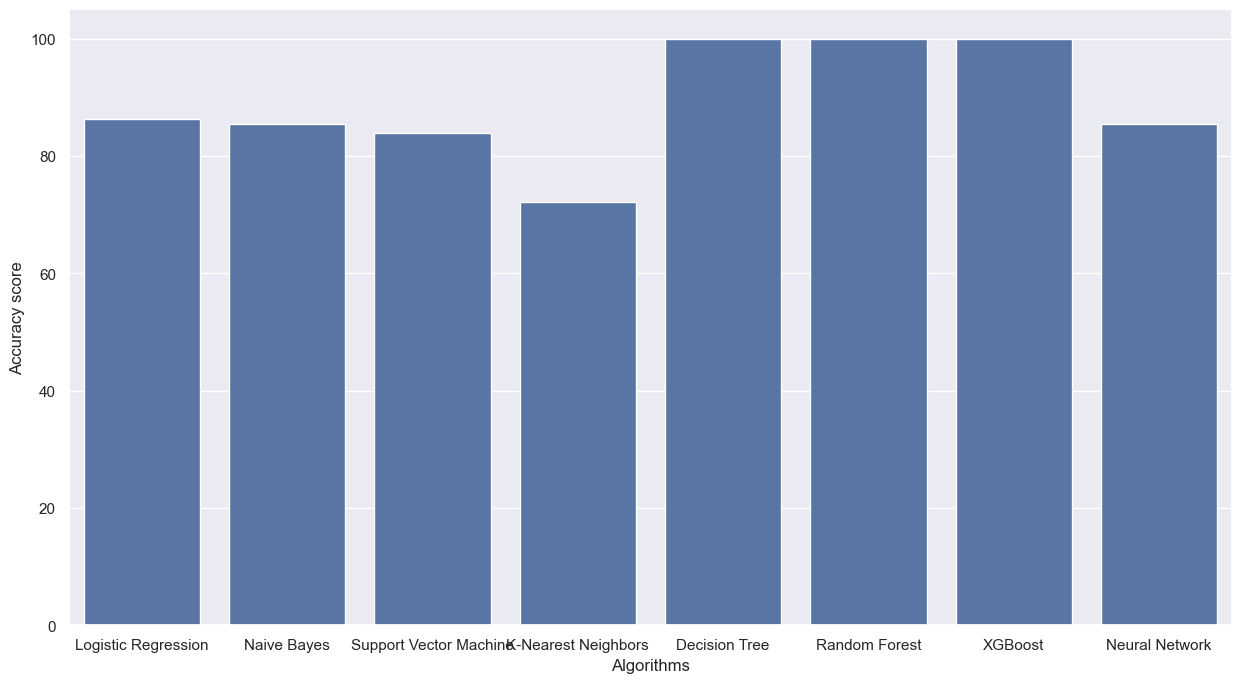

In [76]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

##sns.barplot(algorithms,scores)
sns.barplot(x=algorithms, y=scores)

In [77]:
from sklearn.metrics import mean_squared_error

models = [dt,xgb_model]
for model in models:
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_loss = mean_squared_error(Y_train, train_preds)
    test_loss = mean_squared_error(Y_test, test_preds)

    print(f"Training Loss (MSE): {train_loss:.4f}")
    print(f"Test Loss (MSE): {test_loss:.4f}")

    if test_loss > train_loss * 1.5:  # 50% increase threshold
        print("The model is likely overfitting.")
    else:
        print("The model is generalizing well.")


Training Loss (MSE): 0.0000
Test Loss (MSE): 0.0000
The model is generalizing well.
Training Loss (MSE): 0.0000
Test Loss (MSE): 0.0000
The model is generalizing well.


Degree 1: Train Error = 178.8159, Test Error = 134.8823
Degree 8: Train Error = 25.2976, Test Error = 6.7023
Degree 10: Train Error = 21.9620, Test Error = 13.9730


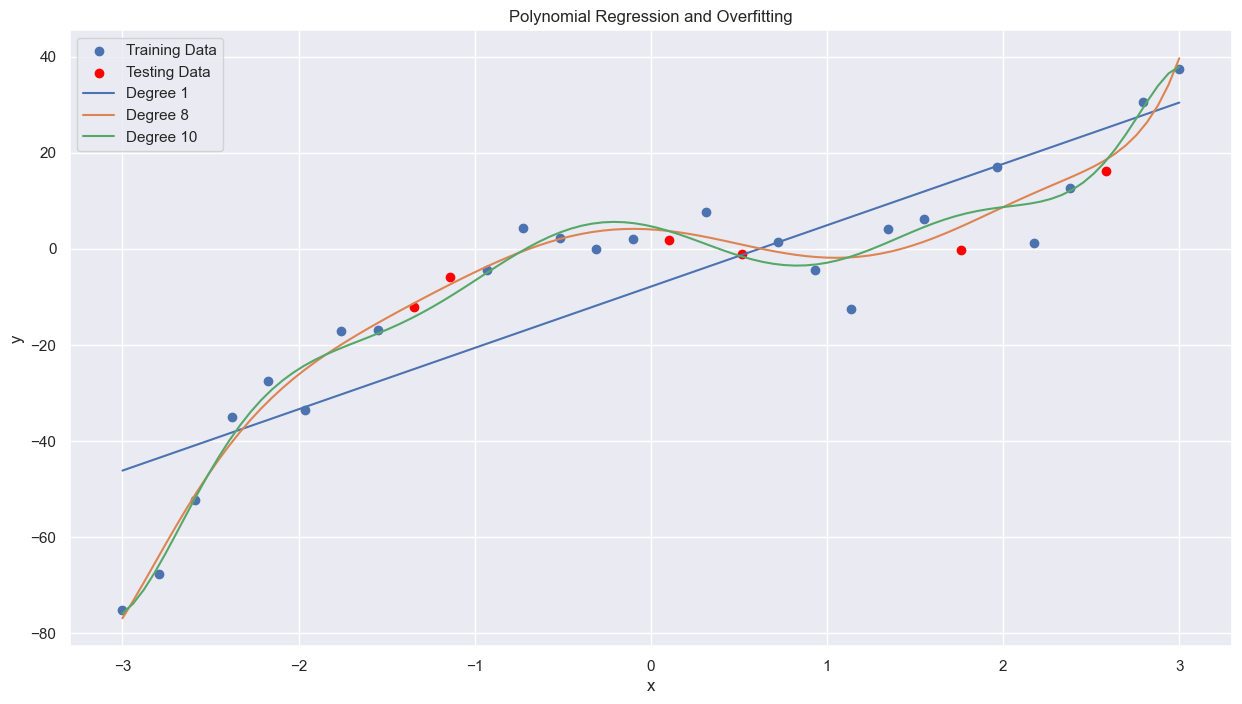

In [78]:

##polynomial regression for overfitting 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
x = np.linspace(-3, 3, 30)
y = 2 * x**3 - 3 * x**2 + x + np.random.randn(30) * 5  # Cubic function with noise

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_test = x_train.reshape(-1, 1), x_test.reshape(-1, 1)

# Plot original data
plt.scatter(x_train, y_train, label="Training Data")
plt.scatter(x_test, y_test, label="Testing Data", color='red')

# Fit polynomial models of different degrees and compute errors
def plot_polynomial_regression(degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train, y_train)
    x_range = np.linspace(-3, 3, 100).reshape(-1, 1)
    y_pred = model.predict(x_range)
    
    # Calculate training and testing errors
    train_error = mean_squared_error(y_train, model.predict(x_train))
    test_error = mean_squared_error(y_test, model.predict(x_test))
    print(f"Degree {degree}: Train Error = {train_error:.4f}, Test Error = {test_error:.4f}")
    
    plt.plot(x_range, y_pred, label=f"Degree {degree}")

# Fit and plot low-degree and high-degree models
for degree in [1, 8, 10]:
    plot_polynomial_regression(degree)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Regression and Overfitting")
plt.show()


Scatter Matrix of Unclean Data

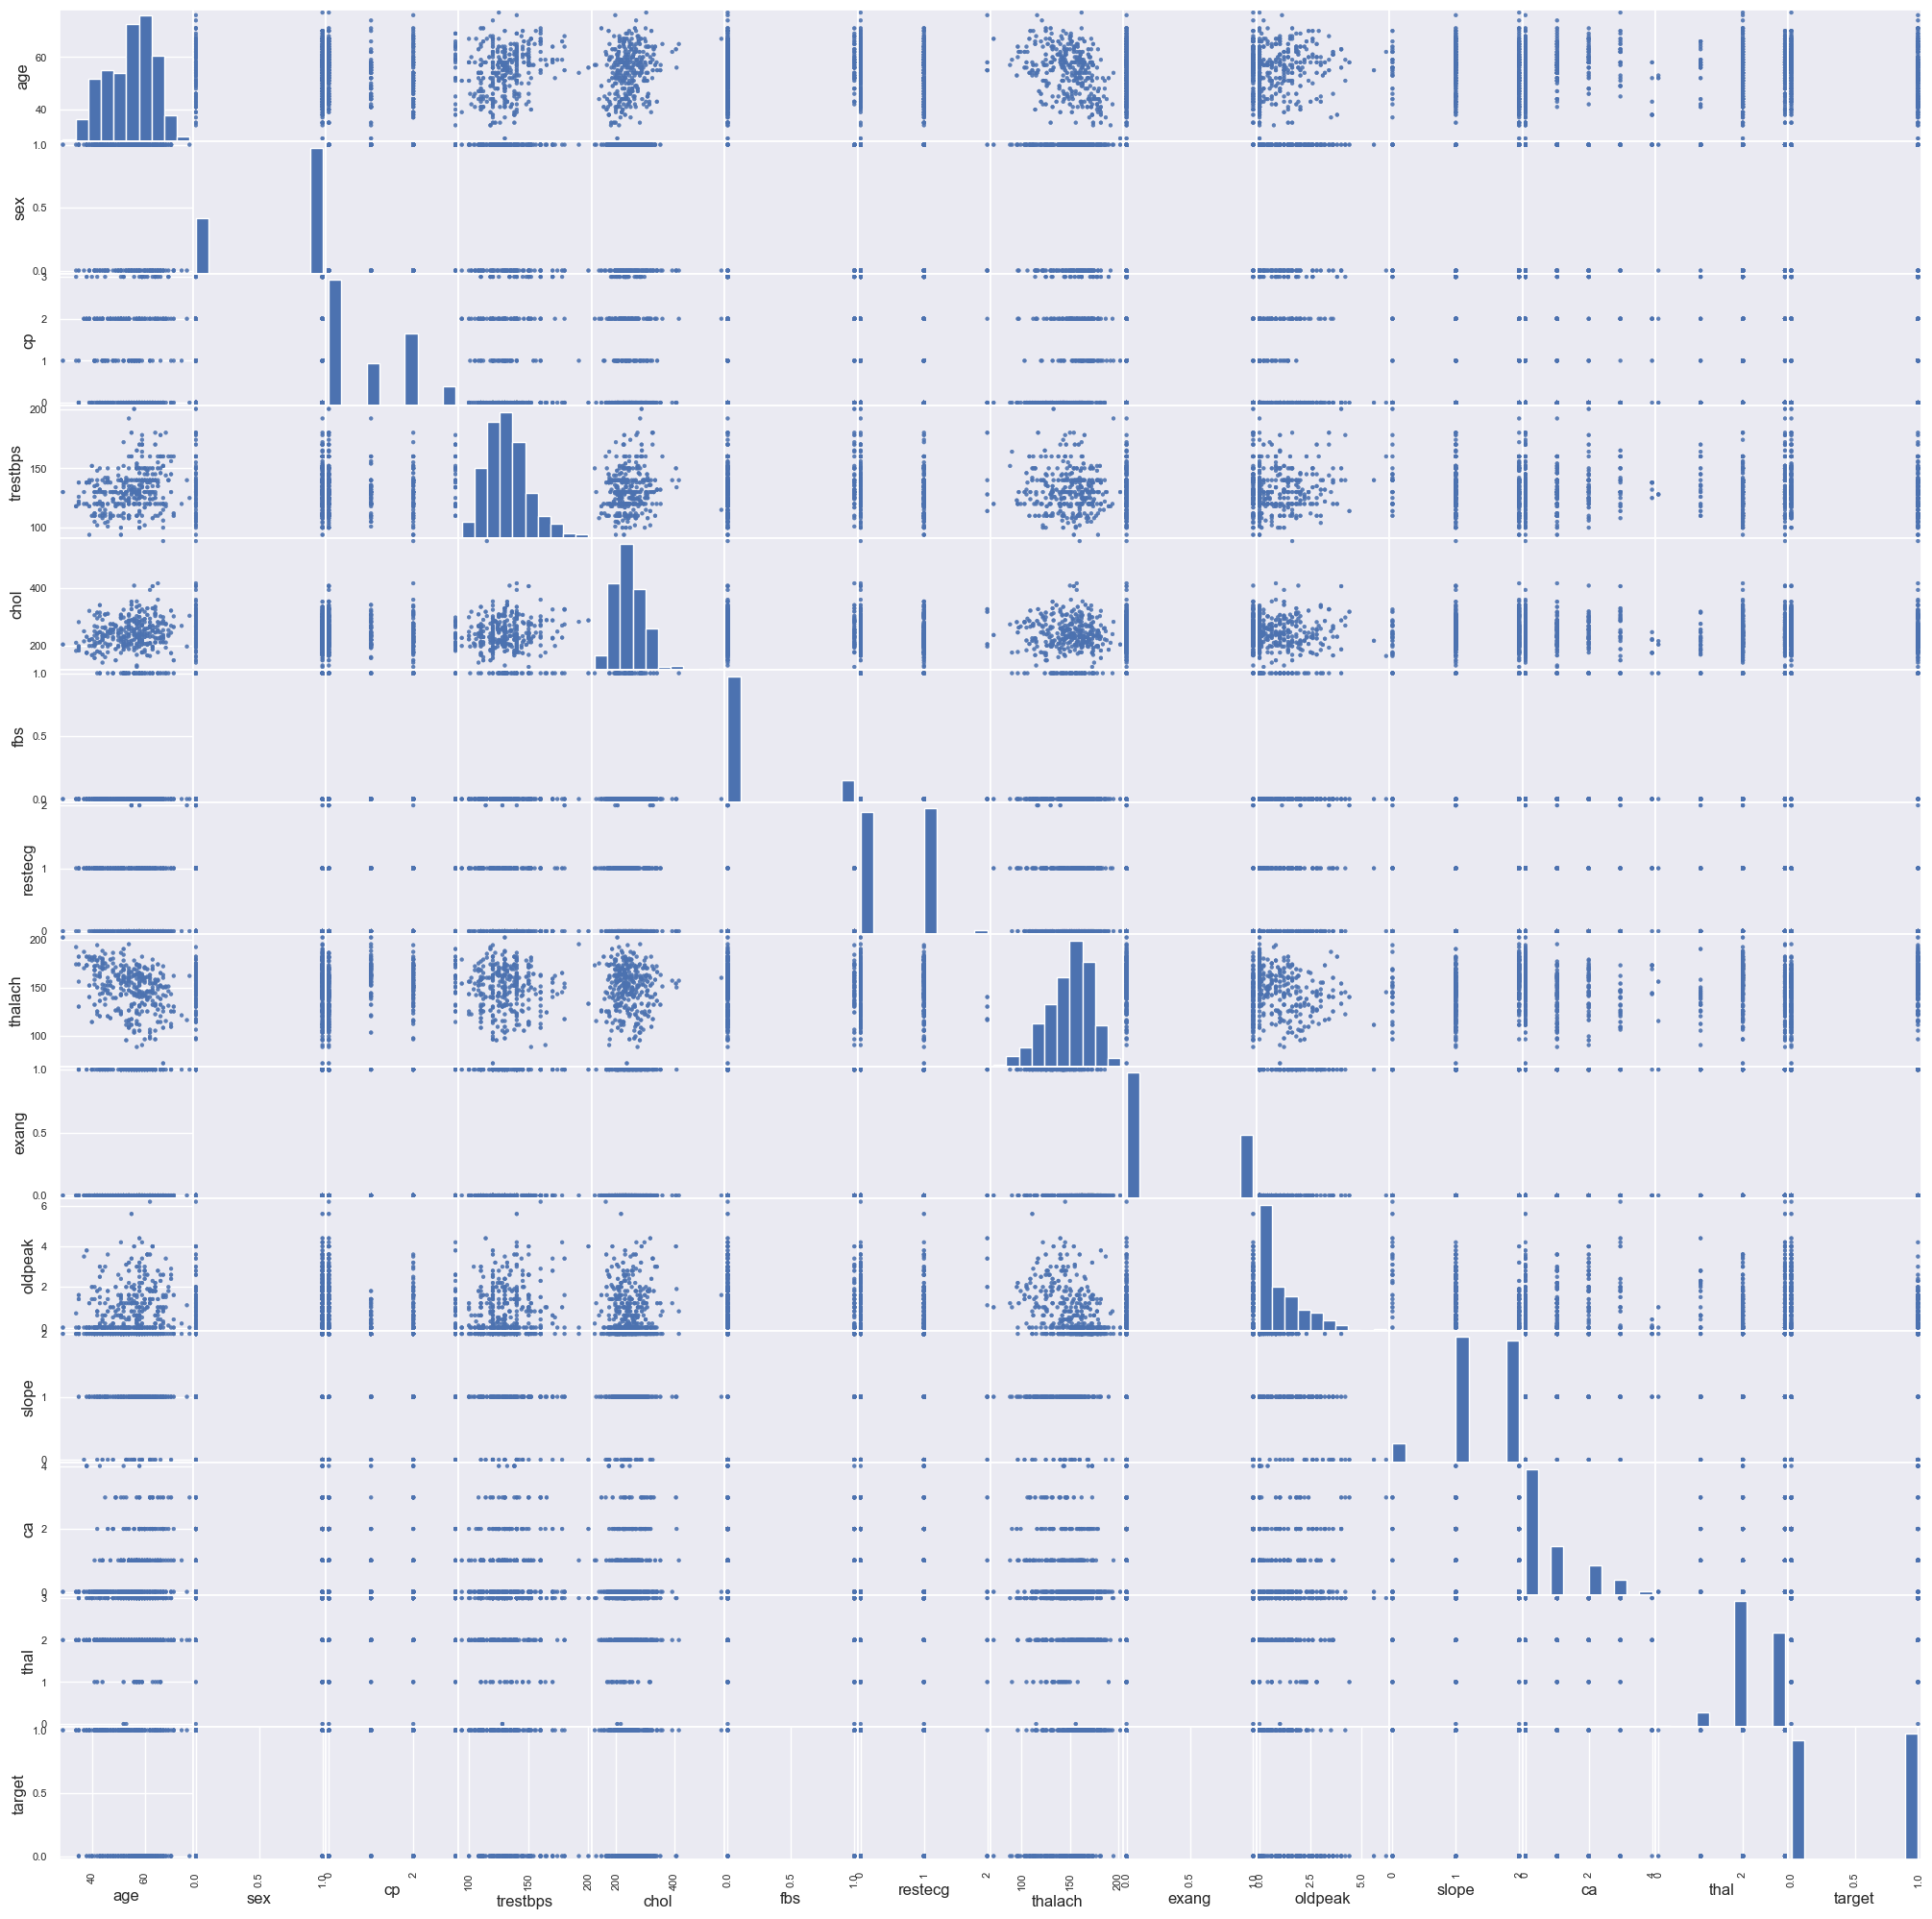

In [79]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(df,figsize=(25, 25))

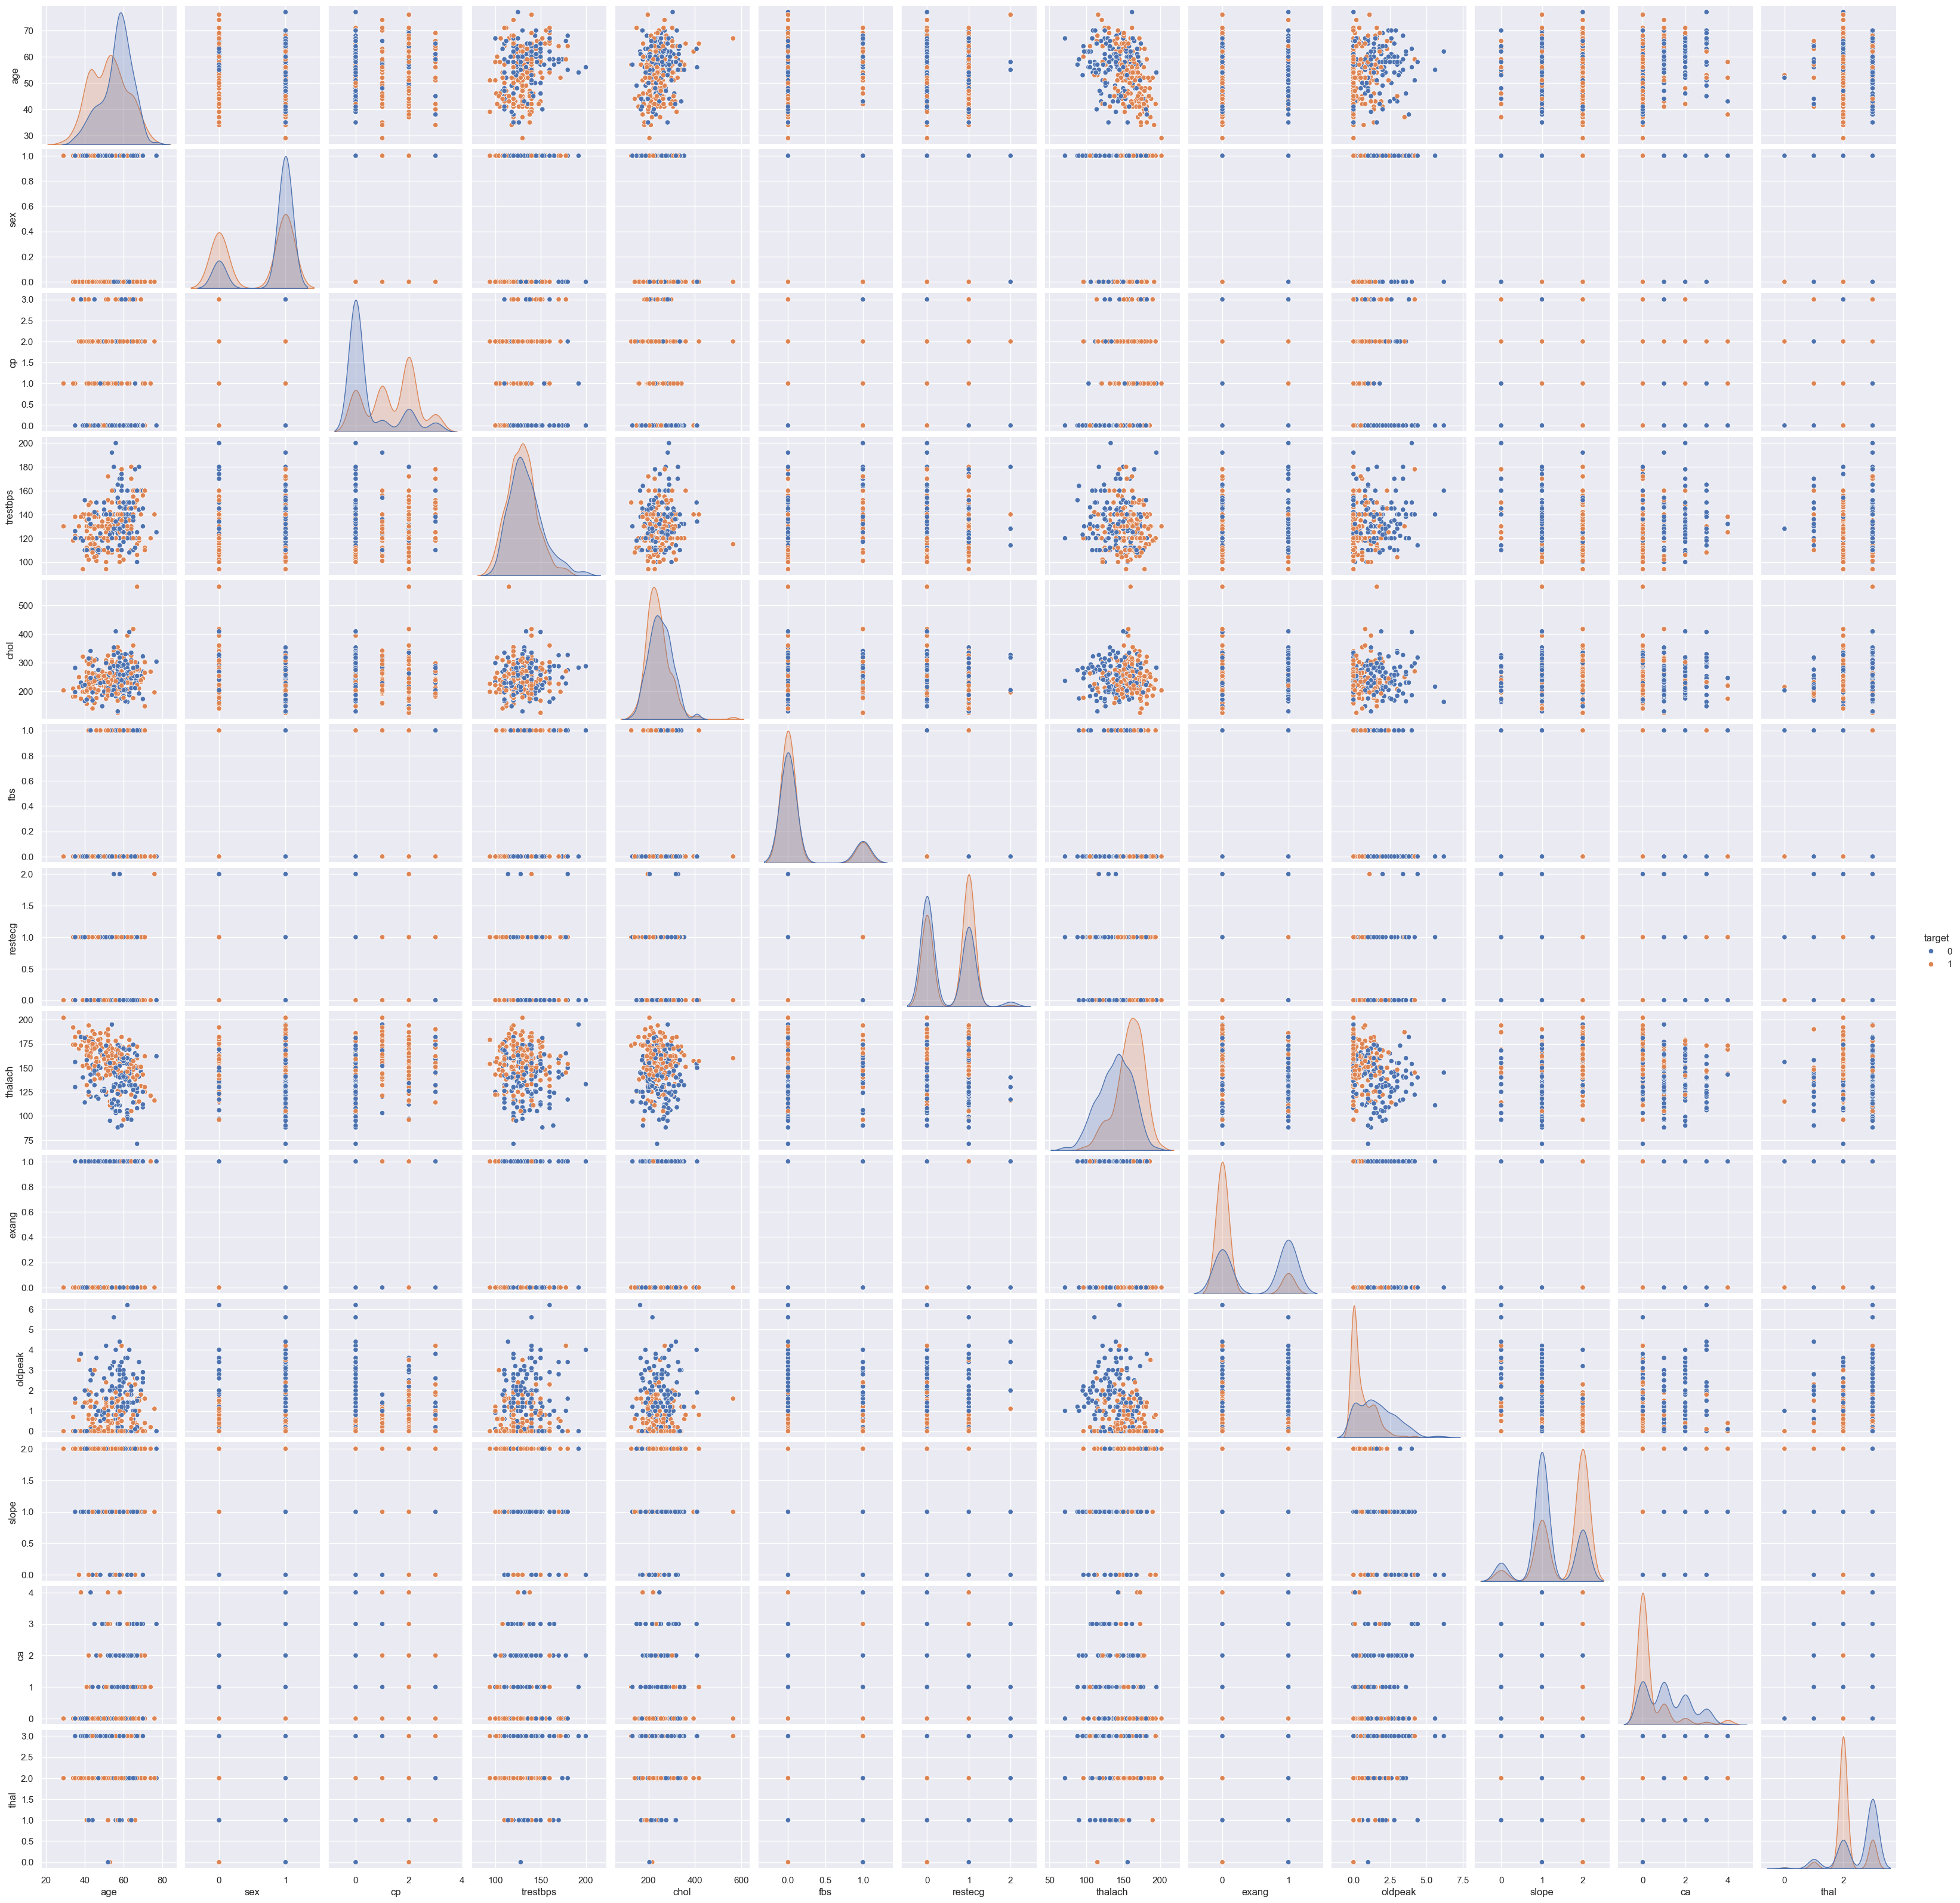

In [80]:
p=sns.pairplot(df, hue = 'target')

In [81]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


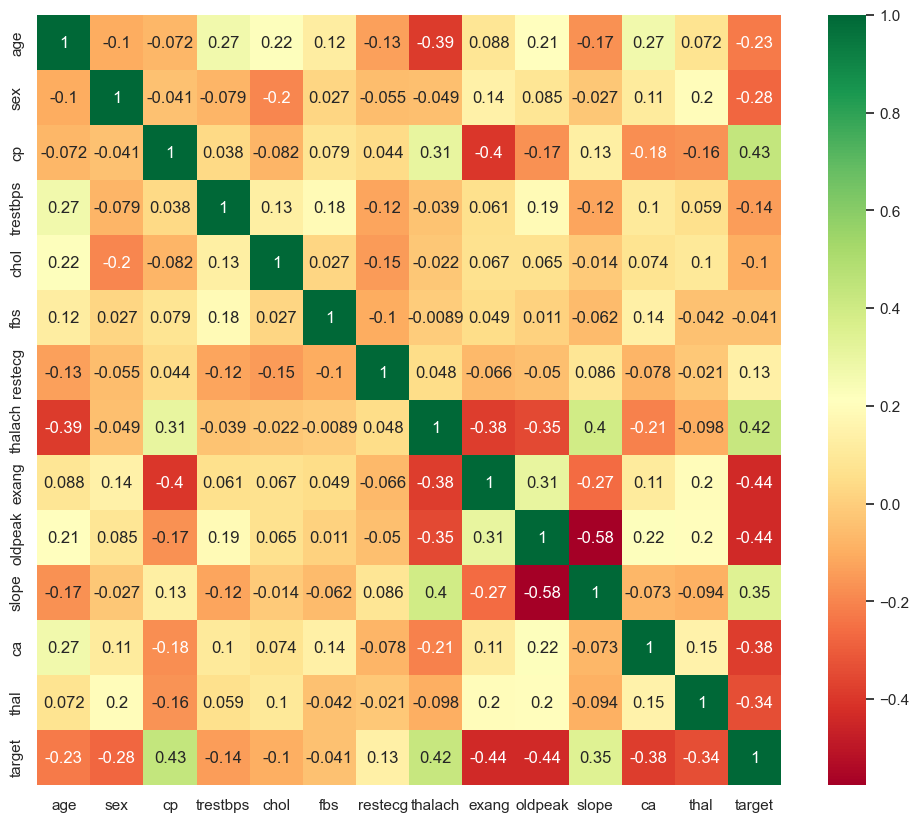

In [82]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

 Preprocess Data

In [83]:
import pandas as pd

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
# Load dataset
df = pd.read_csv(r"C:\Users\Dell\Downloads\heart.csv")

# Check for missing values
print(df.isnull().sum())

# Define features and target
X = df.drop(columns=["target"])  
y = df["target"]

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling (standardizing numerical values)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [86]:
from sklearn.metrics import mean_squared_error

# Predict on train and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("MSE (Training):", mse_train)
print("MSE (Testing):", mse_test)

# If MSE on training is much lower than on testing, the model is likely overfitting.


MSE (Training): 0.3207317073170732
MSE (Testing): 0.375609756097561


In [88]:
# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [94]:
import joblib

# Save the model
joblib.dump(model, "heart_disease_model.joblib")

# Load the model
loaded_model = joblib.load("heart_disease_model.joblib")

# Check if it works
print(loaded_model.predict(X_test))


[0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1.]


In [95]:
import os

# Create a folder if it doesn't exist
os.makedirs("save_model", exist_ok=True)

# Save the model in the folder
joblib.dump(model, "save_model/heart_disease_model.joblib")
print("Model saved inside 'save_model' folder!")


Model saved inside 'save_model' folder!


In [96]:
loaded_model = joblib.load("save_model/heart_disease_model.joblib")
print(loaded_model.predict(X_test))


[0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1.]
